In [28]:
#importing Module
import numpy as np
import pandas as pd

In [29]:
data = pd.read_csv('train_ctrUa4K.csv')
print(data.shape)
data.head(2)

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [31]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [61]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
col = data.columns

In [43]:
col_null = []
for i in col:
    if data[i].isnull().sum() >= 1:
        col_null.append(i)

In [44]:
col_null

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [63]:
data['Gender'] = data['Gender'].fillna('Male')

In [67]:
data['Dependents'] = data['Dependents'].fillna('0')

In [70]:
data['Married'] = data['Married'].fillna('Yes')

In [73]:
data['Self_Employed'] = data['Self_Employed'].fillna('No')

In [77]:
import matplotlib.pyplot as plt

(array([ 72., 310., 143.,  33.,  15.,   6.,   5.,   3.,   3.,   2.]),
 array([  9. ,  78.1, 147.2, 216.3, 285.4, 354.5, 423.6, 492.7, 561.8,
        630.9, 700. ]),
 <BarContainer object of 10 artists>)

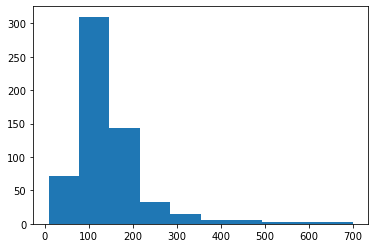

In [84]:
plt.hist(data['LoanAmount'])

In [89]:
data['LoanAmount'] = data['LoanAmount'].fillna(np.median(data['LoanAmount'].dropna()))

(array([  3.,   6.,   3.,  44.,   4.,   0.,  13., 512.,   0.,  15.]),
 array([ 12. ,  58.8, 105.6, 152.4, 199.2, 246. , 292.8, 339.6, 386.4,
        433.2, 480. ]),
 <BarContainer object of 10 artists>)

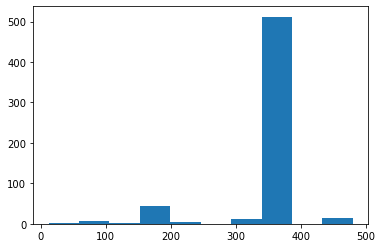

In [92]:
plt.hist(data['Loan_Amount_Term'])

In [93]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(np.median(data['Loan_Amount_Term'].dropna()))

In [96]:
data['Credit_History'] = data['Credit_History'].fillna(1)

In [97]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [99]:
data.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y


In [101]:
data['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [105]:
data = data.replace({'Gender':{'Male':0,'Female':1}})

In [107]:
data['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [108]:
data = data.replace({'Married':{'Yes':1,'No':0}})

In [111]:
data['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [112]:
data = data.replace({'Education':{'Graduate':1,'Not Graduate':0}})

In [114]:
data['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [115]:
data = data.replace({'Self_Employed':{'Yes':1,'No':0}})

In [117]:
data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [118]:
data = data.replace({'Property_Area':{'Semiurban':0,'Urban':1,'Rural':2}})

In [120]:
data = data.replace({'Loan_Status':{'Y':1,'N':0}})

In [175]:
data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [176]:
data = data.replace({'Dependents':{'3+':3}})

In [177]:
data

,x0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,LP001002,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,1
1,1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
2,1,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,LP002978,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,2,1
610,1,LP002979,0,1,3,1,0,4106,0.0,40.0,180.0,1.0,2,1
611,1,LP002983,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,1
612,1,LP002984,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,1


In [216]:
x = data.drop(['Loan_Status','Loan_ID'], axis = 1)
#data.insert(0,'x0',1) # adding feature x0


In [217]:
x

,x0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,1
1,1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2
2,1,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,1
3,1,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1
4,1,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,2
610,1,0,1,3,1,0,4106,0.0,40.0,180.0,1.0,2
611,1,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,1
612,1,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,1


In [218]:
x = np.array(x)

In [195]:
y = data['Loan_Status']
#y = np.array(y)

In [196]:
m = data.shape[0]

m

614

In [197]:
from scipy.special import expit

In [198]:
#defining hypothesis

def hypothesis(mytheta,myx):
    return expit(np.dot(myx,mytheta))

In [199]:
#defining function that will compute cost
def costCompute(mytheta,myx,myy,mylambda=0.):
    term1 = np.dot(-np.array(y).T,np.log(hypothesis(mytheta,myx)))
    term2 = np.dot(1-np.array(y).T,np.log(1-hypothesis(mytheta,myx)))
    regterm = (mylambda/2) * np.sum(np.dot(mytheta[1:].T,mytheta[1:])) #Skip theta0
    
    return float( (1./m) * ( np.sum(term1 - term2) + regterm ) )
    

In [200]:
initial_theta = np.zeros((x.shape[1],1)) #declaring initial_theta with all values as Zero
initial_theta.shape

(12, 1)

In [201]:
round(costCompute(initial_theta,x,y,mylambda=0.),3) #this will be our cost value for initial_theta

0.693

In [190]:
data['Dependents'] = pd.to_numeric(data['Dependents'],errors='coerce') 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   x0                 614 non-null    int64  
 1   Loan_ID            614 non-null    object 
 2   Gender             614 non-null    int64  
 3   Married            614 non-null    int64  
 4   Dependents         614 non-null    int64  
 5   Education          614 non-null    int64  
 6   Self_Employed      614 non-null    int64  
 7   ApplicantIncome    614 non-null    int64  
 8   CoapplicantIncome  614 non-null    float64
 9   LoanAmount         614 non-null    float64
 10  Loan_Amount_Term   614 non-null    float64
 11  Credit_History     614 non-null    float64
 12  Property_Area      614 non-null    int64  
 13  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 67.3+ KB


In [202]:
from scipy import optimize

def optimizeTheta(mytheta,myX,myy,mylambda=0.):
    result = optimize.fmin(costCompute, x0=mytheta, args=(myX, myy, mylambda), maxiter=4000, full_output=True)
    return result[0], result[1]

In [204]:
theta_his = []
cost_value =[]
theta = initial_theta
for i in range(0,10):
    theta, mincost = optimizeTheta(theta,x,y)
    theta_his.append(theta)
    cost_value.append(mincost)

Optimization terminated successfully.
         Current function value: 0.624540
         Iterations: 152
         Function evaluations: 246
Optimization terminated successfully.
         Current function value: 0.603826
         Iterations: 1468
         Function evaluations: 2005
Optimization terminated successfully.
         Current function value: 0.600489
         Iterations: 2097
         Function evaluations: 2870
Optimization terminated successfully.
         Current function value: 0.463397
         Iterations: 2059
         Function evaluations: 2806
Optimization terminated successfully.
         Current function value: 0.458434
         Iterations: 3315
         Function evaluations: 4473
Optimization terminated successfully.
         Current function value: 0.458434
         Iterations: 154
         Function evaluations: 265
Optimization terminated successfully.
         Current function value: 0.458434
         Iterations: 159
         Function evaluations: 274
Optimization

In [260]:
theta

array([-2.24844920e+00,  6.52324143e-03,  5.52654839e-01,  4.24632747e-02,
        3.88222417e-01, -2.27780893e-02,  8.93507502e-06, -5.08360634e-05,
       -1.81160400e-03, -7.36148699e-04,  3.88539048e+00, -4.25411615e-01])

In [382]:
test_data = pd.read_csv('test_lAUu6dG.csv')

In [383]:
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [407]:
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [386]:
test_data['Gender'] = test_data['Gender'].fillna('Male')

In [392]:
test_data = test_data.replace({'Dependents':{'3+':3}})

In [394]:
test_data['Dependents'] = test_data['Dependents'].fillna(0)

In [396]:
test_data['Dependents'] = pd.to_numeric(test_data['Dependents'],errors='coerce')

In [401]:
test_data.Credit_History.value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [399]:
test_data['Self_Employed'] = test_data['Self_Employed'].fillna('No')

In [402]:
test_data['Credit_History'] = test_data['Credit_History'].fillna(1.0)

In [413]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    int64  
 2   Married            367 non-null    int64  
 3   Dependents         367 non-null    int64  
 4   Education          367 non-null    int64  
 5   Self_Employed      367 non-null    int64  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(7), object(2)
memory usage: 34.5+ KB


In [405]:
test_data['LoanAmount'] = test_data['LoanAmount'].fillna(np.median(test_data['LoanAmount'].dropna()))

In [406]:
test_data['Loan_Amount_Term'] = test_data['Loan_Amount_Term'].fillna(np.median(test_data['Loan_Amount_Term'].dropna()))

In [409]:
test_data = test_data.replace({'Gender':{'Male':0,'Female':1}})

In [410]:
test_data = test_data.replace({'Married':{'Yes':1,'No':0}})

In [411]:
test_data = test_data.replace({'Self_Employed':{'Yes':1,'No':0}})

In [412]:
test_data = test_data.replace({'Education':{'Graduate':1,'Not Graduate':0}})

In [414]:
test_data = test_data.replace({'Property_Area':{'Semiurban':0,'Urban':1,'Rural':2}})

In [416]:
test_data.insert(0,'x0',1)

In [420]:
test_data.head()

,x0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,LP001015,0,1,0,1,0,5720,0,110.0,360.0,1.0,1
1,1,LP001022,0,1,1,1,0,3076,1500,126.0,360.0,1.0,1
2,1,LP001031,0,1,2,1,0,5000,1800,208.0,360.0,1.0,1
3,1,LP001035,0,1,2,1,0,2340,2546,100.0,360.0,1.0,1
4,1,LP001051,0,0,0,0,0,3276,0,78.0,360.0,1.0,1


In [419]:
test_data.columns

Index(['x0', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [422]:
theta.shape

(12,)

In [424]:
x1 = test_data.drop(['Loan_ID'], axis = 1)


In [426]:
x1 = np.array(x1)

In [427]:
y = hypothesis(theta,x1)

In [421]:
submit = test_data.drop(['x0', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'], axis = 1)

In [435]:
submit['Loan_Status'] = np.round(y)

In [436]:
submit

,Loan_ID,Loan_Status
0,LP001015,1.0
1,LP001022,1.0
2,LP001031,1.0
3,LP001035,1.0
4,LP001051,1.0
...,...,...
362,LP002971,1.0
363,LP002975,1.0
364,LP002980,1.0
365,LP002986,1.0


In [437]:
submit.to_csv('Submit.csv', index = False)

In [438]:
df = pd.read_csv('Submit.csv')

In [439]:
df = df.replace({'Loan_Status':{1.0:'Y',0.0:'N'}})

In [440]:
df

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [441]:
df.to_csv('Final_submit.csv', index = False)